In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import UnivariateSpline

In [2]:
data = pd.read_excel("216.xlsx")
data.head()

,p20,u20,p30,u30,p40,u40,p45,u45,p50,u50,Unnamed: 10,t,trans
0,4.00,130,4.00,125,4.00,115,4.00,113,4.0,113,NaN,20.0,40.7
1,3.60,115,3.55,105,3.60,100,3.65,102,3.6,96,NaN,30.0,41.6
2,3.20,97,3.15,88,3.15,84,3.20,85,3.2,81,NaN,40.0,41.6
3,2.85,82,2.80,73,2.80,68,2.75,68,2.8,66,NaN,45.0,42.5
4,2.40,60,2.45,58,2.45,56,2.35,52,2.4,52,NaN,50.0,43.6


In [3]:
temp = data['t'].dropna()
T = temp + 273.15

In [4]:
trans = data['trans'].dropna()
trans

0    40.7
1    41.6
2    41.6
3    42.5
4    43.6
Name: trans, dtype: float64

In [5]:
def linear(x, y, label = None, shape = None):
    plt.scatter(x, y, label=label+'$\degree C$', marker=shape)
    coeffs = np.polyfit(x, y, 1)
    pol = lambda x: coeffs[0] * x + coeffs[1]
    t = np.linspace(2, 4, 100)
    plt.plot(t, pol(t), alpha=0.4)
    return coeffs[0]

In [2]:
latex = data.style.hide(level=0, axis=0).to_latex(column_format="|c" * 8 + "|").replace("\\\n", "\\ \hline\n")
print(latex)

NameError: name 'data' is not defined

In [8]:
data.style.to_latex('')

'\\begin{tabular}{lrrrrrrrrrrrrr}\n & p20 & u20 & p30 & u30 & p40 & u40 & p45 & u45 & p50 & u50 & Unnamed: 10 & t & trans \\\\\n0 & 4.000000 & 130 & 4.000000 & 125 & 4.000000 & 115 & 4.000000 & 113 & 4.000000 & 113 & nan & 20.000000 & 40.700000 \\\\\n1 & 3.600000 & 115 & 3.550000 & 105 & 3.600000 & 100 & 3.650000 & 102 & 3.600000 & 96 & nan & 30.000000 & 41.600000 \\\\\n2 & 3.200000 & 97 & 3.150000 & 88 & 3.150000 & 84 & 3.200000 & 85 & 3.200000 & 81 & nan & 40.000000 & 41.600000 \\\\\n3 & 2.850000 & 82 & 2.800000 & 73 & 2.800000 & 68 & 2.750000 & 68 & 2.800000 & 66 & nan & 45.000000 & 42.500000 \\\\\n4 & 2.400000 & 60 & 2.450000 & 58 & 2.450000 & 56 & 2.350000 & 52 & 2.400000 & 52 & nan & 50.000000 & 43.600000 \\\\\n5 & 2.000000 & 48 & 2.000000 & 45 & 2.050000 & 43 & 2.050000 & 42 & 2.000000 & 38 & nan & nan & nan \\\\\n\\end{tabular}\n'

In [119]:
'''table = pd.DataFrame({'2$\Delta P$, Па':data['p20'].dropna(), '2$V,$ мкВ': data['u20'], '2$\Delta T,$К' : data['u20'].dropna()/trans[0],
                      '3$\Delta P$, Па':data['p30'].dropna(), '3$V,$ мкВ': data['u30'], '3$\Delta T,$К' : data['u30'].dropna()/trans[1],
                      '4$\Delta P$, Па':data['p40'].dropna(), '4$V,$ мкВ': data['u40'], '4$\Delta T,$К' : data['u40'].dropna()/trans[2],
                     })'''

table = pd.DataFrame({'45$\Delta P$, Па':data['p45'].dropna(), '45$V,$ мкВ': data['u45'], '45$\Delta T,$К' : data['u45'].dropna()/trans[3],
                       '5$\Delta P$, Па':data['p50'].dropna(), '5$V,$ мкВ': data['u50'], '5$\Delta T,$К' : data['u50'].dropna()/trans[4],
                     })

table

,"45$\Delta P$, Па","45$V,$ мкВ","45$\Delta T,$К","5$\Delta P$, Па","5$V,$ мкВ","5$\Delta T,$К"
0,4.00,113,2.658824,4.0,113,2.591743
1,3.65,102,2.400000,3.6,96,2.201835
2,3.20,85,2.000000,3.2,81,1.857798
3,2.75,68,1.600000,2.8,66,1.513761
4,2.35,52,1.223529,2.4,52,1.192661
5,2.05,42,0.988235,2.0,38,0.871560


In [120]:
'''fmt = {"2$\Delta P$, Па": "{:.2f}", "2$V,$ мкВ": "{:.0f}", '2$\Delta T,$К': "{:.2f}",
       "3$\Delta P$, Па": "{:.2f}", "3$V,$ мкВ": "{:.0f}", "3$\Delta T,$К": "{:.2f}",
       "4$\Delta P$, Па": "{:.2f}", "4$V,$ мкВ": "{:.0f}", "4$\Delta T,$К": "{:.2f}"}'''

fmt = {"45$\Delta P$, Па": "{:.2f}", "45$V,$ мкВ": "{:.0f}", '45$\Delta T,$К': "{:.2f}",
       "5$\Delta P$, Па": "{:.2f}", "5$V,$ мкВ": "{:.0f}", "5$\Delta T,$К": "{:.2f}"}

latex = table.style.hide(level=0, axis=0).format(fmt).to_latex(column_format="|c" * 8 + "|").replace("\\\n", "\\ \hline\n")
print(latex)

\begin{tabular}{|c|c|c|c|c|c|c|c|}
45$\Delta P$, Па & 45$V,$ мкВ & 45$\Delta T,$К & 5$\Delta P$, Па & 5$V,$ мкВ & 5$\Delta T,$К \\ \hline
4.00 & 113 & 2.66 & 4.00 & 113 & 2.59 \\ \hline
3.65 & 102 & 2.40 & 3.60 & 96 & 2.20 \\ \hline
3.20 & 85 & 2.00 & 3.20 & 81 & 1.86 \\ \hline
2.75 & 68 & 1.60 & 2.80 & 66 & 1.51 \\ \hline
2.35 & 52 & 1.22 & 2.40 & 52 & 1.19 \\ \hline
2.05 & 42 & 0.99 & 2.00 & 38 & 0.87 \\ \hline
\end{tabular}



array([1.03917552, 0.97851297, 0.90099433, 0.87182663, 0.85517693])

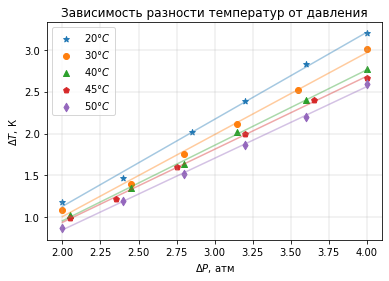

In [138]:
mu = np.array([
linear(data['p20'].dropna(), data['u20'].dropna()/trans[0], '20', '*'),
linear(data['p30'].dropna(), data['u30'].dropna()/trans[1], '30', 'o'),
linear(data['p40'].dropna(), data['u40'].dropna()/trans[2], '40', '^'),
linear(data['p45'].dropna(), data['u45'].dropna()/trans[3], '45', 'p'),
linear(data['p50'].dropna(), data['u50'].dropna()/trans[4], '50', 'd'),
])



0.01974

plt.title(r"Зависимость разности температур от давления")
plt.ylabel(r"$\Delta T$, К")
plt.xlabel(r"$\Delta P$, атм")
plt.grid(True, linewidth=0.32)
plt.legend()
plt.savefig("Температура от давления.pdf")

mnk(data['p45'], data['u45']/trans[3])
mu

In [142]:
df, stat = mnk(data['p50'], data['u50']/trans[4])
latex = df.style.hide(level=0, axis=0).format(mnk_fmt).to_latex(column_format="|c" * 8 + "|").replace("\\\n", "\\ \hline\n")
print(latex)
df

\begin{tabular}{|c|c|c|c|c|c|c|c|}
$\overline{x}$ & $\sigma_x^2$ & $\overline{y}$ & $\sigma_y^2$ & $r_{xy}$ & $a$ & $\Delta a$ & $b$ & $\Delta b$ \\ \hline
3.000 & 0.467 & 1.705 & 0.342 & 0.399 & 0.855 & 0.015 & -0.861 & 0.046 \\ \hline
\end{tabular}



,$\overline{x}$,$\sigma_x^2$,$\overline{y}$,$\sigma_y^2$,$r_{xy}$,$a$,$\Delta a$,$b$,$\Delta b$
0,3.0,0.466667,1.704893,0.341699,0.399083,0.855177,0.014865,-0.860638,0.045737


In [207]:
x = 1/T
y = mu

dat = pd.DataFrame({'1/T': x, 'mu' : y})
latex = dat.style.hide(level=0, axis=0).to_latex(column_format="|c" * 2 + "|").replace("\\\n", "\\ \hline\n")
print(latex)
dat

\begin{tabular}{|c|c|}
1/T & mu \\ \hline
0.003411 & 1.039176 \\ \hline
0.003299 & 0.978513 \\ \hline
0.003193 & 0.900994 \\ \hline
0.003143 & 0.871827 \\ \hline
0.003095 & 0.855177 \\ \hline
\end{tabular}



,1/T,mu
0,0.003411,1.039176
1,0.003299,0.978513
2,0.003193,0.900994
3,0.003143,0.871827
4,0.003095,0.855177


In [200]:
x = 1/T
y = mu

mnk_fmt = { '$\overline{x}$' : "{:.3f}",
            '$\sigma_x^2$'   : "{:.2e}",
            '$\overline{y}$' : "{:.3f}",
            '$\sigma_y^2$'   : "{:.2e}",
            '$r_{xy}$'       : "{:.3f}",
            '$a$'            : "{:.3f}",
            '$\Delta a$'     : "{:.3e}",
            '$b$'            : "{:.3f}",
            '$\Delta b$'     : "{:.3f}" }

df, stat = mnk(x, y)
latex = df.style.hide(level=0, axis=0).format(mnk_fmt).to_latex(column_format="|c" * 8 + "|").replace("\\\n", "\\ \hline\n")
print(latex)

df

\begin{tabular}{|c|c|c|c|c|c|c|c|}
$\overline{x}$ & $\sigma_x^2$ & $\overline{y}$ & $\sigma_y^2$ & $r_{xy}$ & $a$ & $\Delta a$ & $b$ & $\Delta b$ \\ \hline
0.003 & 1.30e-08 & 0.929 & 4.82e-03 & 0.000 & 607.622 & 3.020e+01 & -1.032 & 0.098 \\ \hline
\end{tabular}



,$\overline{x}$,$\sigma_x^2$,$\overline{y}$,$\sigma_y^2$,$r_{xy}$,$a$,$\Delta a$,$b$,$\Delta b$
0,0.003228,1.295531e-08,0.929137,0.004819,0.000008,607.621805,30.202646,-1.032386,0.097561


607.6218052926794

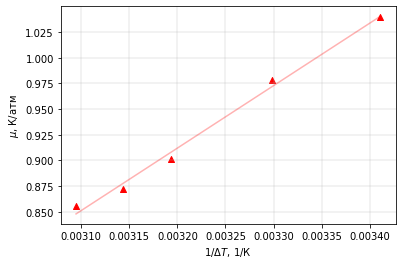

In [254]:
x = 1/T
y = mu


plt.scatter(x, y, marker='^', c='r')
coeffs = np.polyfit(x, y, 1)
pol = lambda x: coeffs[0] * x + coeffs[1]
t = np.linspace(x.min(), x.max(), 100)
plt.plot(t, pol(t), alpha=0.3,c='r')

plt.ylabel(r"$\mu$, К/атм")
plt.xlabel(r"$1/\Delta T$, 1/К")
plt.grid(True, linewidth=0.32)
plt.savefig("Коэффициент от обратной темературы.pdf")

coeffs[0]

In [255]:
df, mk = mnk(x, y)
mnk_fmt = { '$\overline{x}$' : "{:.3f}",
            '$\sigma_x^2$'   : "{:.2e}",
            '$\overline{y}$' : "{:.3f}",
            '$\sigma_y^2$'   : "{:.2e}",
            '$r_{xy}$'       : "{:.3f}",
            '$a$'            : "{:.3f}",
            '$\Delta a$'     : "{:.3e}",
            '$b$'            : "{:.3f}",
            '$\Delta b$'     : "{:.3f}" }

latex = df.style.hide(level=0, axis=0).format(mnk_fmt).to_latex(column_format="|c" * 8 + "|").replace("\\\n", "\\ \hline\n")
print(latex)
df

\begin{tabular}{|c|c|c|c|c|c|c|c|}
$\overline{x}$ & $\sigma_x^2$ & $\overline{y}$ & $\sigma_y^2$ & $r_{xy}$ & $a$ & $\Delta a$ & $b$ & $\Delta b$ \\ \hline
0.003 & 1.30e-08 & 0.929 & 4.82e-03 & 0.000 & 607.622 & 3.020e+01 & -1.032 & 0.098 \\ \hline
\end{tabular}



,$\overline{x}$,$\sigma_x^2$,$\overline{y}$,$\sigma_y^2$,$r_{xy}$,$a$,$\Delta a$,$b$,$\Delta b$
0,0.003228,1.295531e-08,0.929137,0.004819,0.000008,607.621805,30.202646,-1.032386,0.097561


In [262]:
mk[8]/mk[7] * 

-0.09450021638502429

In [266]:
a = (mk[5] * 40 * 8.314462 / 2 ) * 10**(-5)
a

1.0104096820955322

In [267]:
b = - mk[7] * 40 * 10**(-5)
b

0.0004129543598722423

In [269]:
Tkr = (8*a)/(27*8.314462*b)
Tkr

87.194183159998

In [32]:
latex = df.style.hide(level=0, axis=0).to_latex(column_format="|c" * 8 + "|").replace("\\\n", "\\ \hline\n")
print(latex)

\begin{tabular}{|c|c|c|c|c|c|c|c|}
$\overline{x}$ & $\sigma_x^2$ & $\overline{y}$ & $\sigma_y^2$ & $r_{xy}$ & $a$ & $\Delta a$ & $b$ & $\Delta b$ \\ \hline
0.003228 & 0.000000 & 0.929137 & 0.004819 & 0.000008 & 607.621805 & 30.202646 & -1.032386 & 0.097561 \\ \hline
\end{tabular}



In [134]:
mnk_fmt = { '$\overline{x}$' : "{:.3f}",
            '$\sigma_x^2$'   : "{:.3f}",
            '$\overline{y}$' : "{:.3f}",
            '$\sigma_y^2$'   : "{:.3f}",
            '$r_{xy}$'       : "{:.3f}",
            '$a$'            : "{:.3f}",
            '$\Delta a$'     : "{:.3f}",
            '$b$'            : "{:.3f}",
            '$\Delta b$'     : "{:.3f}" }

def mnk(x, y):
    sx = (x**2).mean() - (x.mean())**2
    sy = (y**2).mean() - (y.mean())**2
    rxy = (y*x).mean() - (y.mean() * x.mean())
    a = rxy / sx
    da = (1/(len(x) - 2) * (sy/sx - a**2))**(0.5)
    b = y.mean() - a * x.mean()
    db = da*(sx + (x.mean())**2)**(1/2)
    dat = pd.DataFrame({
        '$\overline{x}$' : [x.mean()],
        '$\sigma_x^2$'   : [sx],
        '$\overline{y}$' : [y.mean()],
        '$\sigma_y^2$'   : [sy],
        '$r_{xy}$'       : [rxy],
        '$a$'            : [a],
        '$\Delta a$'     : [da],
        '$b$'            : [b],
        '$\Delta b$'     : [db],
    })
    return dat, [x.mean(), sx, y.mean(), sy, rxy, a, da, b, db]


In [127]:

latex = mnk(x,y).style.hide(level=0, axis=0).to_latex(column_format="|c" * 8 + "|").replace("\\\n", "\\ \hline\n")
print(latex)


AttributeError: 'tuple' object has no attribute 'style'

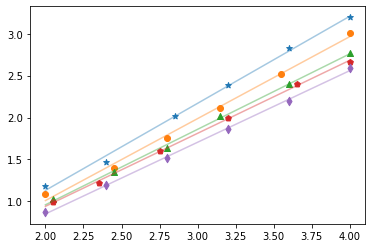

In [38]:
mu = np.array([
linear(data['p20'], data['u20']/trans[0], '20', '*'),
linear(data['p30'], data['u30']/trans[1], '30', 'o'),
linear(data['p40'], data['u40']/trans[2], '40', '^'),
linear(data['p45'], data['u45']/trans[3], '45', 'p'),
linear(data['p50'], data['u50']/trans[4], '50', 'd'),
])